# Wavelet results classification

After transform all the data, we saved the data for all the subjects, for each animal, for each level, and variance for each orientation. Since the statistical testing didn't work out well, now we are going to do the classification. 

## BA17 classification

### step 1 load data (BA17)

In [1]:
%pylab inline
import sklearn
from scipy.io import loadmat
import pandas as pd
from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [2]:
#load in the final data: all subject, all animals, all levels, all orientations;
#data = np.load('data_all_subjects_final_log_BA17.npy')
data = np.load('allsubjs_vstacked_readyfor_classification_occipital.npy')

In [3]:
data.shape 

(512, 5, 28, 8)

512 is all TRs, 5 is 5 levels, 28 orientation, 8 subjects.

In [73]:
#load in all the labels/conditions

conditions=loadmat('all_subjects_18/regressors_sh3.mat')
conditions = conditions['regressors_sh3']
conditions.shape #12 labels, 1230trs

(12, 1230)

12 is 12 animals, 1230 TRs

In [45]:
def convert_binary_to_multiclass(binary_conditions):
    """Convert binary representation into multiclass reprentation:
    For example: convert [[1 1 1 1 0 0 0 0]
                          [0 0 0 0 1 1 1 1]]
    to [1 1 1 1 2 2 2 2]"""
    x,y = np.where(binary_conditions)
    conditions=np.zeros(binary_conditions.shape[1])
    conditions[y]=x+1
    return conditions

conditions_multi = convert_binary_to_multiclass(conditions)
conditions_multi[:123]#first run

array([ 0.,  0.,  0.,  0.,  0.,  8.,  8.,  8.,  8.,  0.,  0.,  0.,  0.,
        0.,  0.,  7.,  7.,  7.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 11.,
       11., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,  9.,
        0.,  0.,  0.,  0.,  0.,  0.,  5.,  5.,  5.,  5.,  0.,  0.,  0.,
        0.,  0.,  0., 10., 10., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,  3.,
        3.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  2.,  2.,  0.,  0.,
        0.,  0.,  0.,  0., 12., 12., 12., 12.,  0.,  0.,  0.,  0.,  0.,
        0.,  4.,  4.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  6.,
        6.,  6.,  0.,  0.,  0.,  0.])

NameError: name 'subject' is not defined

np.save ("conditions.npy", conditions_multi)

In [74]:
# Then I label all the conditions
insect1 = conditions_multi == 1
insect2 = conditions_multi == 2
insect3 = conditions_multi == 3
insect4 = conditions_multi == 4
bird1 = conditions_multi == 5
bird2 = conditions_multi == 6
bird3 = conditions_multi == 7
bird4 = conditions_multi == 8
monkey1 = conditions_multi == 9
monkey2 = conditions_multi == 10
monkey3 = conditions_multi == 11
monkey4 = conditions_multi == 12

In [7]:
insect1.shape

(1230,)

In [8]:
data[:,:,:,0].shape

(1230, 5, 28)

## Classification analysis


First, we need to isoldate each level because we want to compare the accuracy across levels. For each levels, the features would be 28 orientation values (variance). 

How to deal with all the subjects? First we will try treat all the subjects equally without regarding their differences. So we will use all the subjects data. 

How to deal with all the TRs? We can't avarage all the TRs because it doesn't make sense. We will keep all the TRs. 

### Data frame transform

For the data, we will need 1230x18(rows), 28 (features; columns), 1230x18 (identities;rows);

The shape of the feature matrix is (1230x18, 28); The shape of the label matrix is (1230x18,1): 1 is for each animal identification.

Nest step is to transform the data based on above:


In [9]:
#First, let's work on the level1, but save separately the data on each level.

L1= data[:,0,:,:]
L2= data[:,1,:,:]
L3= data[:,2,:,:]
L4= data[:,3,:,:]
L5= data[:,4,:,:]

L1.shape

(1230, 28, 18)

In [10]:
subj=[]
for i in range(18):
    subj_data=L1[:,:,i]
    subj.append(subj_data)
L1_features=np.vstack(subj)

subj2=[]
for i in range(18):
    subj2_data=L2[:,:,i]
    subj2.append(subj2_data)
L2_features=np.vstack(subj2)

subj3=[]
for i in range(18):
    subj3_data=L3[:,:,i]
    subj3.append(subj3_data)
L3_features=np.vstack(subj3)

subj4=[]
for i in range(18):
    subj4_data=L4[:,:,i]
    subj4.append(subj4_data)
L4_features=np.vstack(subj4)

subj5=[]
for i in range(18):
    subj5_data=L5[:,:,i]
    subj5.append(subj5_data)
L5_features=np.vstack(subj5)

#L1_new=np.reshape(L1,(1230*18,28))
#L1_new.shape

In [11]:
L4_features.shape #It is the shape we want!

(22140, 28)

In [39]:
# Next, work on the labels matrix
conditions_multi=conditions_multi.reshape(1230,1)

In [41]:
labels_list=[]
for i in range(18):
    labels_list.append(conditions_multi)
labels = np.vstack(labels_list)

In [42]:
labels.shape

(22140, 1)

Now all the features and labels are transformed as we needed.

In [14]:
#Now let's get rid of resting state:
#L1_features=L1_features[!=0]


In [43]:
no_res=labels!=0
no_res=no_res.reshape(1230*18)

In [44]:
labels_no_res=labels[no_res]
labels_no_res.shape

(8640, 1)

In [45]:
L1_features_no_res=L1_features[no_res,:]
L2_features_no_res=L2_features[no_res,:]
L3_features_no_res=L3_features[no_res,:]
L4_features_no_res=L4_features[no_res,:]
L5_features_no_res=L5_features[no_res,:]

L2_features_no_res.shape

(8640, 28)

### Classification

In [18]:
# It seems works, let's examine if the results is significant, so we will try cross-validation
# from sklearn.model_selection import LeaveOneOut 
# LOOCV give too many folds, which is not adviable. Let's try kfolds=10. Marc's papers used this many folds.

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = L3_features_no_res
y = labels_no_res

#loo = LeaveOneOut()

kf = KFold(n_splits=10)

#kf.get_n_splits(X)

#print kf

accuracy=[]

for train_index, test_index in kf.split(X): 
    #print "TRAIN:", train_index, "TEST:", test_index 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print X_train, X_test, y_train, y_test
    
    # Train the model using the training sets
    model = KNeighborsClassifier(n_neighbors=10)
    
    model.fit(X_train,y_train)# model fit traning set.

    #Predict Output
    predicted = model.predict(X_test) # 0:Overcast, 2:Mild
    acc=accuracy_score(y_test, predicted)
    accuracy.append(acc)

print accuracy


/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[0.08680555555555555, 0.08101851851851852, 0.09143518518518519, 0.07291666666666667, 0.09490740740740741, 0.09722222222222222, 0.08449074074074074, 0.0787037037037037, 0.07523148148148148, 0.09259259259259259]


In [19]:
# Test the result significance
from scipy import stats

t_svm, p_svm= stats.ttest_1samp(accuracy,1./12)

print 't_value_kkn=', t_svm
print 'p_value_kkn=', p_svm

t_value_kkn= 0.8219539126740627
p_value_kkn= 0.43233846087649896


In [20]:
# Now let's try GNB classifier

from sklearn.naive_bayes import GaussianNB


X = L3_features_no_res
y = labels_no_res

#loo = LeaveOneOut()

kf = KFold(n_splits=10)

#kf.get_n_splits(X)

#print kf

accuracy=[]

for train_index, test_index in kf.split(X): 
    #print "TRAIN:", train_index, "TEST:", test_index 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print X_train, X_test, y_train, y_test
    
    # Train the model using the training sets
    clf = GaussianNB()
    
    clf.fit(X_train,y_train)# model fit traning set.

    #Predict Output
    predicted = clf.predict(X_test) # 0:Overcast, 2:Mild
    acc=accuracy_score(y_test, predicted)
    accuracy.append(acc)

print accuracy


/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.06944444444444445, 0.09027777777777778, 0.09722222222222222, 0.08333333333333333, 0.09143518518518519, 0.08796296296296297, 0.09027777777777778, 0.08333333333333333, 0.09143518518518519, 0.0763888888888889]


In [21]:
t_gnb, p_gnb= stats.ttest_1samp(accuracy,1./12)

print 't_value_gnb=', t_gnb
print 'p_value_gnb=', p_gnb

t_value_gnb= 1.0704618602100964
p_value_gnb= 0.3122778237252427


In [22]:
# Let's try SVM 

from sklearn import svm
    
X = L2_features_no_res
y = labels_no_res

#loo = LeaveOneOut()

kf = KFold(n_splits=10)

#kf.get_n_splits(X)

#print kf

accuracy=[]

for train_index, test_index in kf.split(X): 
    #print "TRAIN:", train_index, "TEST:", test_index 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print X_train, X_test, y_train, y_test
    
    # Train the model using the training sets
    clf = svm.SVC()
    
    clf.fit(X_train,y_train)# model fit traning set.

    #Predict Output
    predicted = clf.predict(X_test) # 0:Overcast, 2:Mild
    acc=accuracy_score(y_test, predicted)
    accuracy.append(acc)

print accuracy


/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.08217592592592593, 0.08449074074074074, 0.08449074074074074, 0.08449074074074074, 0.08449074074074074, 0.08680555555555555, 0.08101851851851852, 0.08564814814814815, 0.07523148148148148, 0.08333333333333333]


In [23]:
t_svm, p_svm = stats.ttest_1samp(accuracy,1./12)

print 't_value_svm=', t_svm
print 'p_value_svm=', p_svm

t_value_svm= -0.11266736492828354
p_value_svm= 0.912767280440428


L1: p=0.5554454421055945;

L2: p=0.912767280440428;

L3: 


April 9 from last meeting:

- Subjects run seperately;

- Classification run pairwise, item level;

- Leave one out measn leave one run out.

## Plan: 

- Do one subject first, then loop over all the subjects;
- Focus on one level, then loop over all the levels. 
- Seperate all the animals and form all the pairs, choose one pair, eventually loop over all pairs;
- Choose the runs according to the animal pairs, then leave one run for testing. Then shuffle the runs to do the cross-validation
- Then we get the accuracy for each of the cross validation. Because we have 10 runs, so we have 10 accuracy scores. Then average over these 10 scores to give one single value. 
- Run all the loops above, generate one fime for repeated measure anova. 
- Stats part, run the repeated measure anova. 

In [46]:
subject = 0 

level = 3

pair =  [1,2] # represent animal 1 and animal 2 pair

run = 0

In [25]:
# First I will start with one subject. 

subj_data = data[:,:,:,subject] # First choose one subject data

level_data = subj_data[:,level,:] # Then choose one level data

#level_data.shape
# choose the masks corresponding to each animal in the pair
mask_1 = conditions_multi == pair[0]
mask_2 = conditions_multi == pair[1]

# Choose one run data according to the animal pair 
tr_index = np.arange(1230)
# Each run has 123 TRs, to choose the first run, will use the logic below
run_mask = np.logical_and(run*123 <= tr_index, tr_index < (run+1)*123)

# Select the data by applying the mask
pair_mask = np.logical_or(mask_1, mask_2)
pair_mask = pair_mask.reshape(1230)

test_mask = np.logical_and(pair_mask, run_mask) # choose the animal pair and one run data
train_mask = np.logical_and(pair_mask,~run_mask) # ~ means invert mask, mean except that mask; choose the animal pairs and other 9 runs data

test_data =  level_data[test_mask,:]
train_data = level_data[train_mask,:]

#Next generate the features matrix and label matrix to prep for the classification.
labels_test = conditions_multi[test_mask] # choose the animal pair and run masks within all the conditions. test labels
features_test = level_data [test_mask,:] # test features

labels_train = conditions_multi[train_mask]
features_train = level_data [train_mask,:]

# Now we can run classification 

accuracy=[]

X_train, X_test = features_train, features_test
y_train, y_test = labels_train, labels_test
# Train the model using the training sets
#clf = svm.SVC()
model = KNeighborsClassifier(n_neighbors=10)   
model.fit(X_train,y_train)# model fit traning set.

#Predict Output

predicted = clf.predict(X_test) # 0:Overcast, 2:Mild
acc = accuracy_score(y_test, predicted)
accuracy.append(acc)

print accuracy

#train_data.shape

#now we have one run data for testing, we need 9 runs data set for training.



[0.0]


/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Now I turned above into a function:

In [67]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

def wavefunc (subject, level, pair, run): 
    """This function calculate each subject, each level, each animals pairs, and using leaving one run out cross-validation 
        method for classification. Subjects are from [0-18]; levels are from 0-4, animals pairs are from 1-12 (two numbers)
        , run from 1-10. For example, wavefunc (0,3,[1,2],0)"""
    # First I will start with one subject. 

    subj_data = data[:,:,:,subject] # First choose one subject data

    level_data = subj_data[:,level,:] # Then choose one level data

    #level_data.shape
    # choose the masks corresponding to each animal in the pair
    mask_1 = conditions_multi == pair[0]
    mask_2 = conditions_multi == pair[1]

    # Choose one run data according to the animal pair 
    tr_index = np.arange(1230)
    # Each run has 123 TRs, to choose the first run, will use the logic below
    run_mask = np.logical_and(run*123 <= tr_index, tr_index < (run+1)*123)

    # Select the data by applying the mask
    pair_mask = np.logical_or(mask_1, mask_2)
    pair_mask = pair_mask.reshape(1230)

    test_mask = np.logical_and(pair_mask, run_mask) # choose the animal pair and one run data
    train_mask = np.logical_and(pair_mask,~run_mask) # ~ means invert mask, mean except that mask; choose the animal pairs and other 9 runs data

    #test_data =  level_data[test_mask,:]
    #train_data = level_data[train_mask,:]

    #Next generate the features matrix and label matrix to prep for the classification.
    labels_test = conditions_multi[test_mask] # choose the animal pair and run masks within all the conditions. test labels
    features_test = level_data [test_mask,:] # test features

    labels_train = conditions_multi[train_mask]
    features_train = level_data [train_mask,:]

    # Now we can run classification 
    # Improvement 04/23 by standard scaling the data which might improve the analysis a little bit.
    
    #mm_scaler =  preprocessing.MinMaxScaler()
    #scaler = StandardScaler()
    #scaler = RobustScaler()
    

    X_train, X_test = features_train, features_test
    y_train, y_test = labels_train, labels_test #labels no need to be standard transform
    
    #X_train_scaler =  scaler.fit_transform (X_train)
    #X_test_scaler =  scaler.transform (X_test)
    
    # Train the model using the training sets
    model = svm.SVC()
    #model = XGBClassifier()
    #model = KNeighborsClassifier(n_neighbors=10)   
    model.fit(X_train,y_train)# model fit traning set.

    #Predict Output

    predicted = model.predict(X_test) # 0:Overcast, 2:Mild
    acc = accuracy_score(y_test, predicted)
    
    return acc
    #train_data.shape

    #now we have one run data for testing, we need 9 runs data set for training.


In [68]:
# Based on my function above, now I would like to run leave one run out cross-validation.
acc = []
for i in range(10):
    acc.append(wavefunc(0,3,[1,2],i))

acc =  np.asarray(acc)
print acc.mean()
    

0.4


Now I am going to escalate things up to another whole level to update my function with cross-validation built-in.

In [69]:
def wavefunc_cross_validation (subject, level, pair):
    """ This function is just the wavefunc with cross-validation built-in"""   
    acc = []
    for i in range(10):
        acc.append(wavefunc(subject,level,pair,i))

    acc =  np.asarray(acc)
    return acc.mean()

In [70]:
wavefunc_cross_validation(0,3,[1,2])

0.4

In [71]:
# Now I would like to loop over all the subjects, all the levels, and all the animal pairs.

subjects = np.arange(18) # 0-17 ; 18 subjects.

levels = np.arange (5) # 0-4; 5 levels.

animals = np.arange(1,13)

# A Python program to print all 
# combinations of given list

from itertools import combinations 

# Get all combinations of [1, 2, 3] 
# and length 2 
animal_pairs = list(combinations(animals,2))


In [72]:
# Loop over each subject:
data_all = []

for subject in subjects:
    print subject
    for level in levels:
        for animal_pair in animal_pairs:
            acc = wavefunc_cross_validation(subject, level, animal_pair)
            if (animal_pair[0]-1)//4 == (animal_pair[1]-1)//4:
                within = 1
            else:
                within = 0
            result_dict = {
                "subject": subject,
                "level": level,
                "animal1":animal_pair[0],
                "animal2":animal_pair[1],
                "accuracy":acc,
                "within":within
            }
            data_all.append(result_dict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [73]:
df = pd.DataFrame(data_all)
df.to_csv("classification_BA17_withinvscross_logcoef2_svc.csv", index=True) 

### 04/21 Since the pair-wise study didn't work out, I will try category study, which will be more powerful.  

In [75]:
subject = 0 

level = 3

categories = [[1,2,3,4],[5,6,7,8],[9,10,11,12]] # represent all the animals in 3 categories

category_pair = [0, 1]

run = 0


In [76]:
def wavefunc (subject, level, category_pair, run): 
    """This function calculate each subject, each level, each category pairs, and using leaving one run out cross-validation 
        method for classification. Subjects are from [0-18]; levels are from 0-4, category pairs are from 0-2 (two numbers)
        , run from 1-10. For example, wavefunc (0,3,[1,2],0)"""
    # First I will start with one subject. 

    subj_data = data[:,:,:,subject] # First choose one subject data

    level_data = subj_data[:,level,:] # Then choose one level data

    #level_data.shape
   # choose the masks corresponding to each category in the pair
    mask_1 = np.in1d (conditions_multi, categories[category_pair[0]])# np.in1d you need to make sure what shape you want, the shape you want should be put as the first element.
    mask_2 = np.in1d (conditions_multi, categories[category_pair[1]])
    
    # Choose one run data according to the animal pair 
    tr_index = np.arange(1230)
    # Each run has 123 TRs, to choose the first run, will use the logic below
    run_mask = np.logical_and(run*123 <= tr_index, tr_index < (run+1)*123)

    # Select the data by applying the mask
    category_mask = np.logical_or(mask_1, mask_2)
    category_mask = category_mask.reshape(1230)

    test_mask = np.logical_and(category_mask, run_mask) # choose the category pair and one run data
    train_mask = np.logical_and(category_mask,~run_mask) # ~ means invert mask, mean except that mask; choose the animal pairs and other 9 runs data

    test_data =  level_data[test_mask,:]
    train_data = level_data[train_mask,:]

    #Next generate the features matrix and label matrix to prep for the classification.
    labels_test = conditions_multi[test_mask] # choose the category pair and run masks within all the conditions. test labels
    features_test = level_data [test_mask,:] # test features
    labels_test =  (labels_test -1) // 4 

    labels_train = conditions_multi[train_mask]
    labels_train =  (labels_train -1) // 4
    features_train = level_data [train_mask,:]

    # Now we can run classification
    #scaler = StandardScaler()

    X_train, X_test = features_train, features_test
    y_train, y_test = labels_train, labels_test
    
    #X_train_scaler =  scaler.fit_transform (X_train)
    #X_test_scaler=  scaler.transform (X_test)
    
    # Train the model using the training sets
    model = svm.SVC()
    #model = KNeighborsClassifier(n_neighbors=10)   
    model.fit(X_train,y_train)# model fit traning set.

    #Predict Output

    predicted = model.predict(X_test) # 0:Overcast, 2:Mild
    acc = accuracy_score(y_test, predicted)
    
    return acc
    #train_data.shape

    #now we have one run data for testing, we need 9 runs data set for training.


In [77]:
def wavefunc_cross_validation (subject, level, category_pair):
    """ This function is just the wavefunc with cross-validation built-in"""   
    acc = []
    for i in range(10):
        acc.append(wavefunc(subject,level,category_pair,i))

    acc =  np.asarray(acc)
    return acc.mean()

In [78]:
# Now I would like to loop over all the subjects, all the levels, and all the category pairs.

subjects = np.arange(18) # 0-17 ; 18 subjects.

levels = np.arange (5) # 0-4; 5 levels.

category_pair = np.arange(3)

# A Python program to print all 
# combinations of given list

from itertools import combinations 

# Get all combinations of [1, 2, 3] 
# and length 2 
category_pairs = list(combinations(category_pair,2))

In [79]:
category_pairs

[(0, 1), (0, 2), (1, 2)]

In [80]:
# Loop over each subject:
from tqdm import tqdm

data_all = []

for subject in tqdm(subjects):
    for level in levels:
        for category_pair in category_pairs:
            acc = wavefunc_cross_validation(subject, level, category_pair)
            
            result_dict = {
                "subject": subject,
                "level": level,
                "category1":category_pair[0],
                "category2":category_pair[1],
                "accuracy":acc,
            }
            data_all.append(result_dict)

100%|██████████| 18/18 [00:39<00:00,  2.21s/it]


In [81]:
df = pd.DataFrame(data_all)
df.to_csv("VT_svc_3category_pairs.csv", index=True)

### 04/24 Now I would like to try with all the aimals, no category, just make sure the wavelet works.
### 05/25 tried another time with all the animals, but predict only three categories, not each animal.

In [47]:
subject = 0 

level = 3

animals = [1,2,3,4,5,6,7,8,9,10,11,12] # represent all the animals in 3 categories

run = 0


In [48]:
from sklearn import svm
from sklearn.metrics import accuracy_score

def wavefunc (subject, level, animals, run): 
    """This function calculate each subject, each level, each category pairs, and using leaving one run out cross-validation 
        method for classification. Subjects are from [0-18]; levels are from 0-4, category pairs are from 0-2 (two numbers)
        , run from 1-10. For example, wavefunc (0,3,[1,2],0)"""
    # First I will start with one subject. 

    subj_data = data[:,:,:,subject] # First choose one subject data

    level_data = subj_data[:,level,:] # Then choose one level data

    #level_data.shape
   # choose the masks corresponding to each category in the pair
    mask_1 = np.in1d (conditions_multi, animals)# np.in1d you need to make sure what shape you want, the shape you want should be put as the first element.
    mask_2 = np.in1d (conditions_multi, animals)
    
    # Choose one run data according to the animal pair 
    tr_index = np.arange(1230)
    # Each run has 123 TRs, to choose the first run, will use the logic below
    run_mask = np.logical_and(run*123 <= tr_index, tr_index < (run+1)*123)

    # Select the data by applying the mask
    category_mask = np.logical_or(mask_1, mask_2)
    category_mask = category_mask.reshape(1230)

    test_mask = np.logical_and(category_mask, run_mask) # choose the category pair and one run data
    train_mask = np.logical_and(category_mask,~run_mask) # ~ means invert mask, mean except that mask; choose the animal pairs and other 9 runs data

    test_data =  level_data[test_mask,:]
    train_data = level_data[train_mask,:]

    #Next generate the features matrix and label matrix to prep for the classification.
    labels_test = conditions_multi[test_mask] # choose the category pair and run masks within all the conditions. test labels
    #labels_test =  (labels_test -1) // 4 # which convert 1-12 to "0,0,0,0, 1,1,1,1,2,2,2,2"
    features_test = level_data [test_mask,:] # test features

    labels_train = conditions_multi[train_mask]
    #labels_train =  (labels_train -1) // 4
    features_train = level_data [train_mask,:]

    # Now we can run classification
    #scaler = StandardScaler()

    X_train, X_test = features_train, features_test
    y_train, y_test = labels_train, labels_test
    
    #X_train_scaler =  scaler.fit_transform (X_train)
    #X_test_scaler=  scaler.transform (X_test)
    
    #Train the model using the training sets
    model = svm.SVC()
    #model = KNeighborsClassifier(n_neighbors=10) 
    #model = XGBClassifier()
    model.fit(X_train,y_train)# model fit traning set.

    #Predict Output

    predicted = model.predict(X_test) # 0:Overcast, 2:Mild
    acc = accuracy_score(y_test, predicted)
    
    return acc
    #train_data.shape

    #now we have one run data for testing, we need 9 runs data set for training.


In [49]:
def wavefunc_cross_validation (subject, level, animals):
    """ This function is just the wavefunc with cross-validation built-in"""   
    acc = []
    for i in range(10):
        acc.append(wavefunc(subject,level,animals,i))

    acc =  np.asarray(acc)
    return acc.mean()

In [50]:
# Now I would like to loop over all the subjects, all the levels, and all the category pairs.

subjects = np.arange(18) # 0-17 ; 18 subjects.

levels = np.arange (5) # 0-4; 5 levels.

In [51]:
# Loop over each subject:
from tqdm import tqdm

data_all = []

for subject in tqdm(subjects):
    for level in levels:
            acc = wavefunc_cross_validation(subject, level, animals)
            
            result_dict = {
                "subject": subject,
                "level": level,
                "accuracy":acc,
            }
            data_all.append(result_dict)

100%|██████████| 18/18 [00:47<00:00,  2.62s/it]


In [52]:
df = pd.DataFrame(data_all)
df.to_csv("BA17_logcoef_svm_allanimals.csv", index=True)

### 04/25, Lastly, I want to try with all the levels information for within vs across. First i tried with scaler, then no scaler.

In [247]:
subject = 0 

#level = 3

pair =  [1,2] # represent animal 1 and animal 2 pair

run = 0

In [248]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier

def wavefunc (subject, pair, run): 
    """This function calculate each subject, each level, each animals pairs, and using leaving one run out cross-validation 
        method for classification. Subjects are from [0-18]; levels are from 0-4, animals pairs are from 1-12 (two numbers)
        , run from 1-10. For example, wavefunc (0,3,[1,2],0)"""
    # First I will start with one subject. 

    subj_data = data[:,:,:,subject] # First choose one subject data

    #level_data = subj_data[:,level,:] # Then choose one level data

    #level_data.shape
    # choose the masks corresponding to each animal in the pair
    mask_1 = conditions_multi == pair[0]
    mask_2 = conditions_multi == pair[1]

    # Choose one run data according to the animal pair 
    tr_index = np.arange(1230)
    # Each run has 123 TRs, to choose the first run, will use the logic below
    run_mask = np.logical_and(run*123 <= tr_index, tr_index < (run+1)*123)

    # Select the data by applying the mask
    pair_mask = np.logical_or(mask_1, mask_2)
    pair_mask = pair_mask.reshape(1230)

    test_mask = np.logical_and(pair_mask, run_mask) # choose the animal pair and one run data
    train_mask = np.logical_and(pair_mask,~run_mask) # ~ means invert mask, mean except that mask; choose the animal pairs and other 9 runs data

    #test_data =  subj_data[test_mask,:,:].reshape(-1,140) #-1 is automatically calcualted based on the number of rows. 
    #the machine learning has specif structure which is columns represents features and rows represnets labels. 
    #train_data = subj_data[train_mask,:,:].reshape(-1,140)

    #Next generate the features matrix and label matrix to prep for the classification.
    labels_test = conditions_multi[test_mask] # choose the animal pair and run masks within all the conditions. test labels
    features_test = log(subj_data [test_mask,:,:]).reshape(-1,140) # test features

    labels_train = conditions_multi[train_mask]
    features_train = log(subj_data [train_mask,:,:]).reshape(-1,140)

    # Now we can run classification 
    # Improvement 04/23 by standard scaling the data which might improve the analysis a little bit.
    
    #mm_scaler =  preprocessing.MinMaxScaler()
    scaler = StandardScaler()
    #scaler = RobustScaler()
    

    X_train, X_test = features_train, features_test
    y_train, y_test = labels_train, labels_test #labels no need to be standard transform
    
    X_train_scaler =  scaler.fit_transform (X_train)
    X_test_scaler =  scaler.transform (X_test)
    
    # Train the model using the training sets
    model = svm.SVC()
    #model = XGBClassifier()
    #model = KNeighborsClassifier(n_neighbors=10)   
    model.fit(X_train_scaler,y_train)# model fit traning set.

    #Predict Output

    predicted = model.predict(X_test_scaler) # 0:Overcast, 2:Mild
    acc = accuracy_score(y_test, predicted)
    
    return acc
    #train_data.shape

    #now we have one run data for testing, we need 9 runs data set for training.

In [249]:
# Based on my function above, now I would like to run leave one run out cross-validation.
acc = []
for i in range(10):
    acc.append(wavefunc(0,[1,2],i))

acc =  np.asarray(acc)
print acc.mean()
    

0.5


In [250]:
def wavefunc_cross_validation (subject, pair):
    """ This function is just the wavefunc with cross-validation built-in"""   
    acc = []
    for i in range(10):
        acc.append(wavefunc(subject,pair,i))

    acc =  np.asarray(acc)
    return acc.mean()

In [251]:
# Now I would like to loop over all the subjects, and all the animal pairs.

subjects = np.arange(18) # 0-17 ; 18 subjects.

#levels = np.arange (5) # 0-4; 5 levels.

animals = np.arange(1,13)

# A Python program to print all 
# combinations of given list

from itertools import combinations 

# Get all combinations of [1, 2, 3] 
# and length 2 
animal_pairs = list(combinations(animals,2))

In [252]:
# Loop over each subject:
data_all = []

for subject in subjects:
    print subject
    #for level in levels:
    for animal_pair in animal_pairs:
        acc = wavefunc_cross_validation(subject, animal_pair)
        if (animal_pair[0]-1)//4 == (animal_pair[1]-1)//4:
            within = 1
        else:
            within = 0
        result_dict = {
            "subject": subject,
            #"level": level,
            "animal1":animal_pair[0],
            "animal2":animal_pair[1],
            "accuracy":acc,
            "within":within
        }
        data_all.append(result_dict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [253]:
df = pd.DataFrame(data_all)
df.to_csv("classification_BA17_withinvscross_alllevels_svc_logscale_scaler", index=True) 

### It seems the above does not work, then will try will all levels and all animals, then all animals with xgboost

In [132]:
subject = 0 

#level = 3

animals =  [1,2,3,4,9,10,11,12] # represent animal 1 and animal 2 pair

run = 0

In [149]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

def wavefunc (subject, animals, run): 
    """This function calculate each subject, each level, each animals pairs, and using leaving one run out cross-validation 
        method for classification. Subjects are from [0-18]; levels are from 0-4, animals pairs are from 1-12 (two numbers)
        , run from 1-10. For example, wavefunc (0,3,[1,2],0)"""
    # First I will start with one subject. 

    subj_data = data[:,:,:,subject] # First choose one subject data

    #level_data = subj_data[:,level,:] # Then choose one level data

    #level_data.shape
    # choose the masks corresponding to each animal in the pair
    mask_1 = np.in1d (conditions_multi, animals)
    mask_2 = np.in1d (conditions_multi, animals)

    # Choose one run data according to the animal pair 
    tr_index = np.arange(1230)
    # Each run has 123 TRs, to choose the first run, will use the logic below
    run_mask = np.logical_and(run*123 <= tr_index, tr_index < (run+1)*123)

    # Select the data by applying the mask
    pair_mask = np.logical_or(mask_1, mask_2)
    pair_mask = pair_mask.reshape(1230)

    test_mask = np.logical_and(pair_mask, run_mask) # choose the animal pair and one run data
    train_mask = np.logical_and(pair_mask,~run_mask) # ~ means invert mask, mean except that mask; choose the animal pairs and other 9 runs data

    #test_data =  subj_data[test_mask,:,:].reshape(-1,140) #-1 is automatically calcualted based on the number of rows. 
    #the machine learning has specif structure which is columns represents features and rows represnets labels. 
    #train_data = subj_data[train_mask,:,:].reshape(-1,140)

    #Next generate the features matrix and label matrix to prep for the classification.
    labels_test = conditions_multi[test_mask] # choose the animal pair and run masks within all the conditions. test labels
    features_test = subj_data [test_mask,:,:].reshape(-1,140) # test features

    labels_train = conditions_multi[train_mask]
    features_train = subj_data [train_mask,:,:].reshape(-1,140)

    # Now we can run classification 
    # Improvement 04/23 by standard scaling the data which might improve the analysis a little bit.
    
    #mm_scaler =  preprocessing.MinMaxScaler()
    #scaler = StandardScaler()
    #scaler = RobustScaler()
    

    X_train, X_test = features_train, features_test
    y_train, y_test = labels_train, labels_test #labels no need to be standard transform
    
    #X_train_scaler =  scaler.fit_transform (X_train)
    #X_test_scaler=  scaler.transform (X_test)
    
    # Train the model using the training sets
    #model = svm.SVC()
    model = XGBClassifier()
    #model = KNeighborsClassifier(n_neighbors=10)   
    model.fit(X_train,y_train)# model fit traning set.

    #Predict Output
    prediction_x_train = model.predict(X_train)
    predicted = model.predict(X_test) # 0:Overcast, 2:Mild
    acc = accuracy_score(y_test, predicted)
    
    return acc#,y_test,predicted, prediction_x_train,y_train
    #train_data.shape

    #now we have one run data for testing, we need 9 runs data set for training.

In [142]:
acc, y_test, prediction, prediction_x_train,y_train = wavefunc (0,animals,9)
acc

0.1875

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8')]

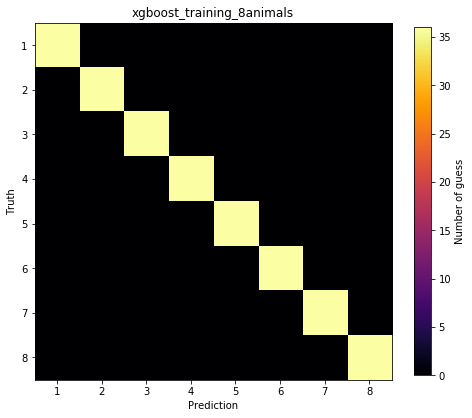

In [143]:
cm = confusion_matrix(y_train, prediction_x_train)
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap = "inferno")
plt.colorbar(shrink=0.8).set_label('Number of guess')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('xgboost_training_8animals')
plt.xticks(np.arange(8))
plt.gca().set_xticklabels(np.arange(1,9))
plt.yticks(np.arange(8))
plt.gca().set_yticklabels(np.arange(1,9))
# plt.xticks(np.arange(1,13))
#plt.savefig('cm_train_e5000_lr0.5_15hidden.png')
#ax.plot([0, 1], [0, 1], transform=ax.transAxes)

In [105]:
prediction.shape

(48,)

[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8')]

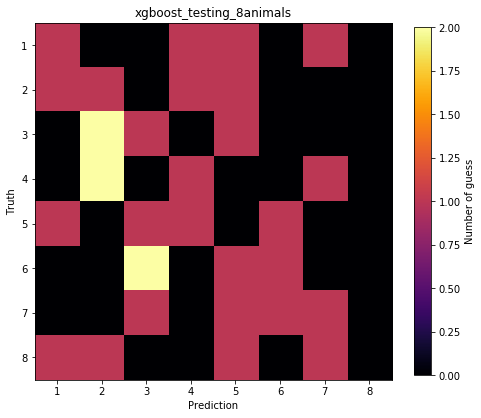

In [144]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap = "inferno")
plt.colorbar(shrink=0.8).set_label('Number of guess')
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('xgboost_testing_8animals')
plt.xticks(np.arange(8))
plt.gca().set_xticklabels(np.arange(1,9))
plt.yticks(np.arange(8))
plt.gca().set_yticklabels(np.arange(1,9))
# plt.xticks(np.arange(1,13))
#plt.savefig('cm_train_e5000_lr0.5_15hidden.png')
#ax.plot([0, 1], [0, 1], transform=ax.transAxes)

In [156]:
def wavefunc_cross_validation (subject, animals):
    """ This function is just the wavefunc with cross-validation built-in"""   
    acc = []
    for i in range(10):
        acc.append(wavefunc(subject,animals,i))

    acc =  np.asarray(acc)
    return acc

In [158]:
# Now I would like to loop over all the subjects, and all the animal pairs.

subjects = np.arange(18) # 0-17 ; 18 subjects.

#levels = np.arange (5) # 0-4; 5 levels.

#animals = np.arange(1,13)

# A Python program to print all 
# combinations of given list

#from itertools import combinations 

# Get all combinations of [1, 2, 3] 
# and length 2 
#animal_pairs = list(combinations(animals,2))

In [159]:
# Loop over each subject:
from tqdm import tqdm

data_all = []

for subject in tqdm(subjects):
    print subject
    #for level in levels:
    #for animal in animals:
    acc = wavefunc_cross_validation(subject, animals)
    #if (animal_pair[0]-1)//4 == (animal_pair[1]-1)//4:
        #within = 1
    #else:
        #within = 0
    result_dict = {
        "subject": subject,
        #"level": level,
        #"animal1":animal_pair[0],
        #"animal2":animal_pair[1],
        "accuracy":acc,
        #"within":within
    }
    data_all.append(result_dict)

  0%|          | 0/18 [00:00<?, ?it/s]

0


  6%|▌         | 1/18 [01:11<20:14, 71.41s/it]

1


 11%|█         | 2/18 [02:23<19:06, 71.65s/it]

2


 17%|█▋        | 3/18 [03:34<17:52, 71.48s/it]

3


 22%|██▏       | 4/18 [04:45<16:39, 71.39s/it]

4


 28%|██▊       | 5/18 [05:55<15:20, 70.83s/it]

5


 33%|███▎      | 6/18 [07:07<14:13, 71.10s/it]

6


 39%|███▉      | 7/18 [08:17<12:59, 70.83s/it]

7


 44%|████▍     | 8/18 [09:28<11:48, 70.87s/it]

8


 50%|█████     | 9/18 [10:39<10:39, 71.05s/it]

9


 56%|█████▌    | 10/18 [11:49<09:24, 70.61s/it]

10


 61%|██████    | 11/18 [13:04<08:23, 71.89s/it]

11


 67%|██████▋   | 12/18 [14:13<07:07, 71.20s/it]

12


 72%|███████▏  | 13/18 [15:24<05:54, 70.91s/it]

13


 78%|███████▊  | 14/18 [16:33<04:41, 70.47s/it]

14


 83%|████████▎ | 15/18 [17:44<03:31, 70.66s/it]

15


 89%|████████▉ | 16/18 [18:54<02:21, 70.58s/it]

16


 94%|█████████▍| 17/18 [20:04<01:10, 70.25s/it]

17


100%|██████████| 18/18 [21:14<00:00, 70.83s/it]


In [171]:
from scipy import stats

for i in range(13):
    a = stats.ttest_1samp(data_all[i]['accuracy'],0.125)
    print a

Ttest_1sampResult(statistic=0.528680532637681, pvalue=0.6098151567906137)
Ttest_1sampResult(statistic=-1.8676290524384016, pvalue=0.0946557058284371)
Ttest_1sampResult(statistic=0.20751433915982165, pvalue=0.8402276669135297)
Ttest_1sampResult(statistic=-1.1677484162422846, pvalue=0.27291221509403707)
Ttest_1sampResult(statistic=0.40824829046386335, pvalue=0.6926333242322502)
Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Ttest_1sampResult(statistic=-0.390566732942472, pvalue=0.7052012581661721)
Ttest_1sampResult(statistic=-1.488558185333922, pvalue=0.17078261244619522)
Ttest_1sampResult(statistic=1.44463023702923, pvalue=0.18246001075133464)
Ttest_1sampResult(statistic=-1.394971664925831, pvalue=0.196490374935594)
Ttest_1sampResult(statistic=0.34874291623145814, pvalue=0.7353018404227665)
Ttest_1sampResult(statistic=-0.8181818181818178, pvalue=0.4343801970835003)
Ttest_1sampResult(statistic=0.0, pvalue=1.0)


In [153]:
df = pd.DataFrame(data_all)
df.to_csv("classification_BA17_alllevels_8animals_xgboost.csv", index=True) 